5 월 최저기온 평균:
12.6, 11.8, 12.6, 13.5, 12.0, 13.1, 13.9, 14.6, 13.7, 14.2, 15.5, 13.3, 13.1, 14.7, 13.8, 14.2, 14.3, 14.2, 15.1, 13.7, 13.8, 15.1, 14.6, 15.1, 15.4, 13.6, 14.5, 14.2, 13.6, 14.0
5 월 최고기온 평균:
24.5, 24.1, 25.3, 25.3, 24.9, 26.1, 25.9, 25.4, 25.4, 25.1, 25.8, 24.0, 24.1, 24.4, 25.9, 24.3, 26.3, 25.7, 27.7, 25.3, 24.2, 26.2, 26.8, 27.9, 28.0, 26.7, 27.5, 24.8, 27.5, 25.7


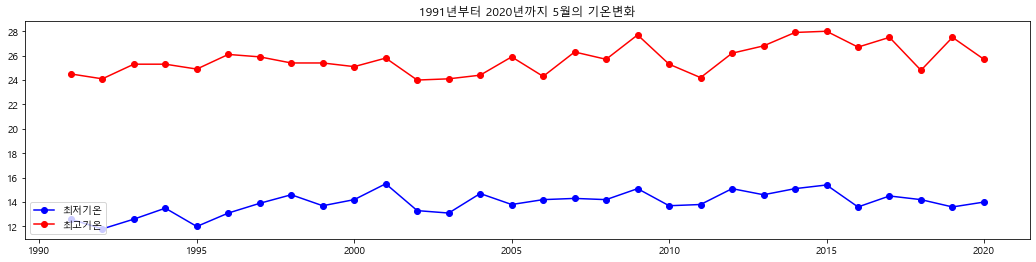

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 플랫폼 보정
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

def show_graph(mm) :
    #글자 깨짐 수정
    plt.rcParams['axes.unicode_minus']=False

    y_low=weather_group_month['최저기온(℃)']
    y_high=weather_group_month['최고기온(℃)']

    plt.figure(figsize=(18,4))
    plt.title('1991년부터 2020년까지 {0}월의 기온변화'.format(mm))

    plt.plot(y_low, marker='o', color = 'blue', label='최저기온')
    plt.plot(y_high, marker='o', color='red', label='최고기온')
    
    plt.legend(loc=3)
    plt.show()

# 데이터 읽어오기
weather_df = pd.read_csv('C:\jupiterworkspace\pandas\data/daegu.csv', encoding='euc_kr')

# 1991년 이후 데이터만 저장
weather_todate_df = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
weather_df['날짜'] = weather_todate_df
weather_df = weather_df[weather_df['날짜'].dt.year >= 1991]

# 월 받아오기
mm = int(input('기온 변화를 측정할 달을 입력하세요: '))
    
# mm달 데이터프레임
condition = weather_df['날짜'].dt.month == mm
weather_month = weather_df[condition] 
yy= weather_df['날짜'].dt.year
weather_group_month = weather_month.groupby(yy).mean()
weather_group_month[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']] = round(weather_group_month[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']], 1)

# 평균 최저기온 출력
print(mm, '월 최저기온 평균:')
for i in range(weather_group_month.shape[0]) :
    if i == weather_group_month.shape[0]-1 :
        print(weather_group_month.iloc[i, 2])
    else :
        print(weather_group_month.iloc[i, 2], end=', ')

# 평균 최고기온 출력
print(mm, '월 최고기온 평균:')
for i in range(weather_group_month.shape[0]) :
    if i == weather_group_month.shape[0]-1 :
        print(weather_group_month.iloc[i, 3])
    else :
        print(weather_group_month.iloc[i, 3], end=', ')

show_graph(mm)